In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_stock_prices.csv to cleaned_stock_prices.csv


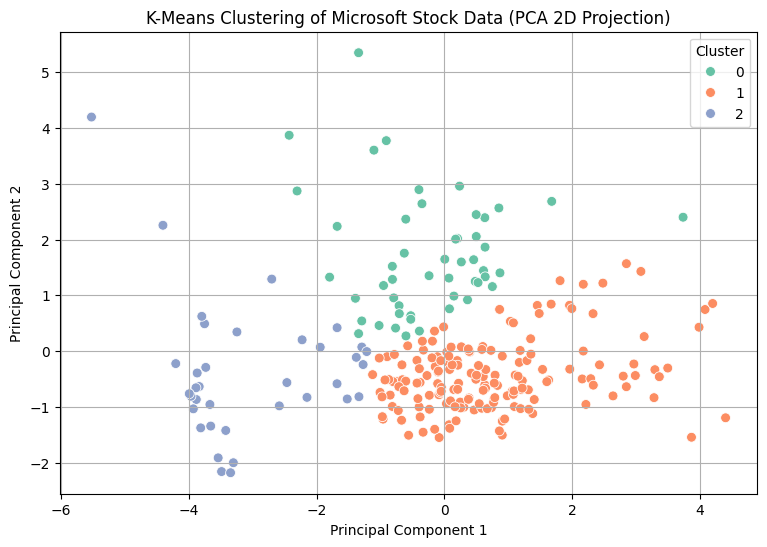

Cluster Summary (Average Feature Values):
               Open        High         Low          Vol.  Daily Range
Cluster                                                               
0        415.577600  419.979400  409.458600  2.878060e+07    10.520800
1        424.032727  426.907273  420.995879  1.774394e+07     5.911394
2        381.366111  384.110278  378.618333  2.435250e+07     5.491944


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_stock_prices.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
def convert_volume(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip()
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
        elif val == '-':
            return None
        else:
            return float(val)
    return val
df['Vol.'] = df['Vol.'].apply(convert_volume)
df['Daily Range'] = df['High'] - df['Low']
df = df.dropna()
features = ['Open', 'High', 'Low', 'Vol.', 'Daily Range']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=50)
plt.title("K-Means Clustering of Microsoft Stock Data (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
cluster_summary = df.groupby('Cluster')[features].mean()
print("Cluster Summary (Average Feature Values):")
print(cluster_summary)
